In [238]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


In [239]:
frame_cc = pd.read_csv('CC GENERAL.csv', sep=',')

In [240]:
frame_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [241]:
frame_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [242]:
frame_cc['MINIMUM_PAYMENTS']
frame_cc['MINIMUM_PAYMENTS'].mean()
frame_cc['MINIMUM_PAYMENTS'].fillna(frame_cc['MINIMUM_PAYMENTS'].mean(), inplace=True)
frame_cc['CREDIT_LIMIT']
frame_cc['CREDIT_LIMIT'].fillna(frame_cc['CREDIT_LIMIT'].mean(), inplace=True)
frame_cc=frame_cc.drop('CUST_ID',axis=1)



In [243]:
frame_cc.isnull().sum()
frame_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [244]:

model=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
clust=model.fit_predict(frame_cc) 
agglomerative=pd.DataFrame(clust)
agglomerative


,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


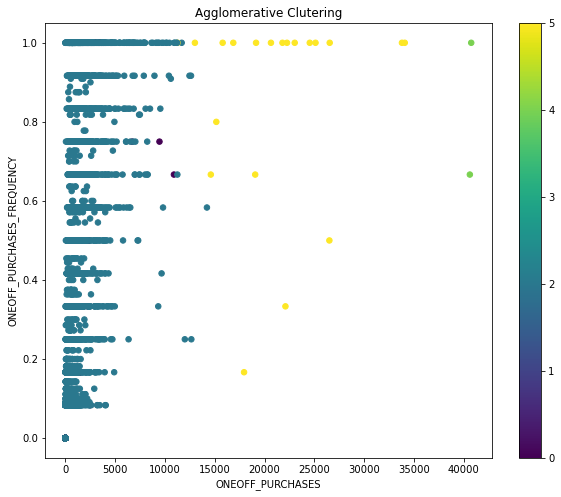

In [246]:
fig =plt.figure(plt.figure(figsize=(10,8)))
ax = fig.add_subplot(111)
scatter = ax.scatter (frame_cc ['ONEOFF_PURCHASES'].values[:,np.newaxis],
                      frame_cc ['ONEOFF_PURCHASES_FREQUENCY'].values[:,np.newaxis], c = agglomerative[0], s=30)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("ONEOFF_PURCHASES")
ax.set_ylabel("ONEOFF_PURCHASES_FREQUENCY")
plt.colorbar(scatter)

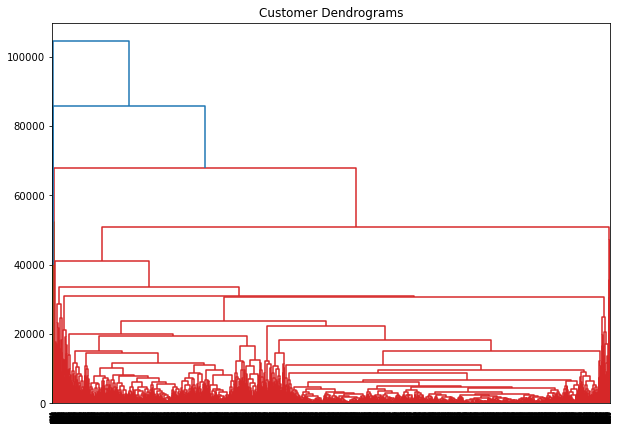

In [247]:

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(frame_cc, method="complete"))

#. Use k-means clustering.

In [138]:
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(frame_cc)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(frame_cc)


array([2, 3, 0, ..., 2, 2, 2], dtype=int32)

In [158]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

dist_2_cent = []
k=range(1, 10)

for k in k:
    km =KMeans (n_clusters=k)
    km = km.fit(frame_cc)
    dist_2_cent.append(km.inertia_)
print(dist_2_cent)



[393060990475.35077, 279296684341.999, 232802839931.34818, 206824677250.91296, 182196544173.90988, 162395877625.18756, 145308303487.47968, 132872737182.26332, 124170070278.41122]


In [159]:
k = (3,4,7,8)
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(frame_cc)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(frame_cc)
kmeans.score(frame_cc)

-232803099786.24118

In [160]:
kmeans=KMeans(n_clusters=4, random_state=0) 
kmeans.fit(frame_cc)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(frame_cc)
kmeans.score(frame_cc)

-206824677250.91302

In [161]:
kmeans=KMeans(n_clusters=7, random_state=0) 
kmeans.fit(frame_cc)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(frame_cc)
kmeans.score(frame_cc)

-145174949455.60684

In [162]:
kmeans=KMeans(n_clusters=8, random_state=0) 
kmeans.fit(frame_cc)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(frame_cc)
kmeans.score(frame_cc)

-132872718133.35516

<function matplotlib.pyplot.show(close=None, block=None)>

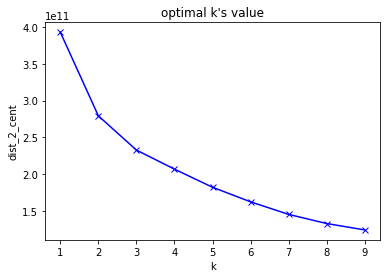

In [163]:
k=[i for i in range(1,10)]
plt.plot(k, dist_2_cent, 'bx-')
plt.xlabel('k')
plt.ylabel('dist_2_cent')
plt.title("optimal k's value")
plt.show

In [253]:
#best k's value k=4

kmeans=KMeans(n_clusters= 4, random_state=0) 
k = kmeans.fit(frame_cc)
y=kmeans.predict(frame_cc)
print(kmeans.cluster_centers_)
label=pd.DataFrame(kmeans.labels_)
label
#kmeans.predict(frame_cc)
#k.inertia_

[[8.41631112e+02 8.53096674e-01 5.13167101e+02 2.49886563e+02
  2.63571248e+02 5.17882105e+02 4.51480385e-01 1.32702844e-01
  3.46084094e-01 1.12580105e-01 2.38354010e+00 9.62554604e+00
  2.31445600e+03 9.19749564e+02 5.95376469e+02 1.45431641e-01
  1.13852874e+01]
 [6.18980012e+03 9.74480194e-01 1.09818978e+03 5.96760183e+02
  5.01516884e+02 4.63025763e+03 3.91818150e-01 1.87891033e-01
  2.96596872e-01 3.88931175e-01 1.17118644e+01 1.71003911e+01
  9.77921062e+03 3.94414388e+03 3.37646448e+03 2.42941904e-02
  1.16245111e+01]
 [1.65053490e+03 9.03089671e-01 1.64162590e+03 1.04310379e+03
  5.98921235e+02 7.06443983e+02 6.03731433e-01 3.56190537e-01
  4.18895671e-01 1.03412063e-01 2.32393162e+00 2.25876068e+01
  7.67328477e+03 2.13495469e+03 6.21309230e+02 2.06720966e-01
  1.17893162e+01]
 [4.79638751e+03 9.05371567e-01 1.13175981e+04 8.11363117e+03
  3.20415025e+03 4.93808868e+03 7.62992408e-01 6.24496775e-01
  6.11410550e-01 2.07918450e-01 8.45833333e+00 8.82916667e+01
  1.26962500e+04

,0
0,0
1,1
2,2
3,2
4,0
...,...
8945,0
8946,0
8947,0
8948,0


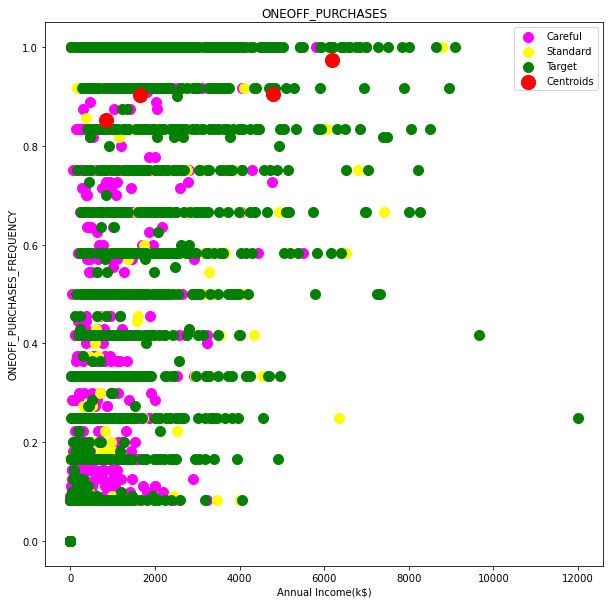

In [254]:


x=frame_cc ['ONEOFF_PURCHASES'].values[:,np.newaxis]
y=frame_cc ['ONEOFF_PURCHASES_FREQUENCY'].values[:,np.newaxis]
plt.figure(figsize =(10, 10))

plt.scatter(x[label == 0,],          
            y[label == 0,],s=100,c='magenta',label='Careful')
plt.scatter(x[label == 1,],
           y[label == 1,],s=100,c='yellow',label='Standard')
plt.scatter(x[label == 2,],
          y[label == 2,],s=100,c='green',label='Target')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')
plt.title('ONEOFF_PURCHASES')
plt.xlabel('Annual Income(k$)')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.legend()
plt.show()

k-Means can produce higher clusters than hierarchical clustering

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

In [255]:

print(f"Silhouette Score(n=4): {silhouette_score(frame_cc, y)}")


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score(n=4): -0.4068136462232919
